In [50]:
!pip3 install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing the necessary libraries and modules

In [51]:
import os 
import cv2

#Viewing the test file (fingerprint to be matched)

In [52]:
sample = cv2.imread("/content/drive/MyDrive/Colab Notebooks/fingerprint detection in python/Finger-Print.tif")
sample = cv2.resize(sample,None,fx=2.5,fy=2.5)


Read, Display and Write images.ipynb [link ](https://colab.research.google.com/drive/1qVdz2ClR9x2Ig7IezGSnw1K8qhBGRoGU?usp=sharing#scrollTo=hNepVUHN0SDe)

In [53]:
from matplotlib import pyplot as plt

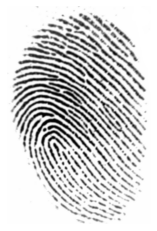

In [54]:
plt.imshow(sample)
plt.axis("off")
plt.show()

#Matching with the database <br>
Sử dụng thuật toán SIFT (Scale-Invariant Feature Transform  [link ](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)) . <Br> <br>
Sử dụng nó để trích xuất các điểm chính và phát hiện các bộ mô tả cho các tính năng được giữ lại tốt nhất. Vì vậy, ở đây chúng ta sẽ sử dụng nó để xác định các điểm chính và bộ mô tả của cả hình ảnh thử nghiệm và hình ảnh cơ sở dữ liệu.

In [55]:
for file in [file for file in os.listdir("/content/drive/MyDrive/Colab Notebooks/fingerprint detection in python/finger-prints")]:
    
    fingerprint_database_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/fingerprint detection in python/finger-prints/"+file)
    
    sift = cv2.xfeatures2d.SIFT_create()
    
    keypoints_1, descriptors_1 = sift.detectAndCompute(sample, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(fingerprint_database_image, None)

Sau khi quá trình phát hiện và tính toán kết thúc, chúng tôi bắt đầu thuật toán so khớp. Chúng tôi sẽ sử dụng chức năng  [FlannBasedMatcher()](https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html)  <br><br>
Vì vậy, giao diện này giúp chúng tôi thực hiện kết hợp nhanh chóng nhưng hiệu quả bằng cách sử dụng thuật toán Cụm và Tìm kiếm. Chúng tôi sẽ duy trì một loạt các điểm như vậy được đưa ra làm đầu ra trong match.

In [85]:
matches = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10), 
          dict()).knnMatch(descriptors_1, descriptors_2, k=2)

match_points = []
   
for p, q in matches:
  if p.distance < 0.1*q.distance:
      match_points.append(p)

#Detecting the ID for the fingerprint matched <br><br>

Bây giờ chúng ta sử dụng hàm cv2.drawMatches() để xác định lề phát hiện điểm chính và sau đó trực quan hóa đầu ra sau khi vẽ các điểm chính phù hợp.

In [79]:
best_score = 0
filename = None
image = None 
kp1,kp2,mp = None,None,None

In [80]:
keypoints = 0
if len(keypoints_1) <= len(keypoints_2):
    keypoints = len(keypoints_1)            
else:
    keypoints = len(keypoints_2)

if len(match_points) / keypoints * 100 > best_score:
   best_score = len(match_points) / keypoints * 100
   filename = file 
   image = fingerprint_database_image
   kp1,kp2,mp = keypoints_1,keypoints_2,match_points

In [81]:
result = cv2.drawMatches(sample,kp1,image,kp2,mp,None)
result = cv2.resize(result, None, fx= 2.5, fy = 2.5)

In [94]:
print("BEST MATCH: " + filename)
print("SCORE (% match:) : " + str(best_score))


BEST MATCH: 1_1.tif
SCORE (% match:) : 8.82543802725503


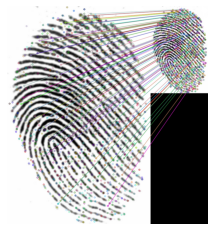

In [95]:
plt.imshow(result)
plt.axis("off")
plt.show()

#Kết luận:
Thuật toán giúp nhận dạng sinh trắc học của những con người khác nhau. Nó bao gồm trích xuất các chi tiết nhỏ và đối sánh các chi tiết nhỏ, đồng thời tạo ra điểm số tương đồng để cho biết các dấu vân tay có giống nhau hay không. Tỷ lệ từ chối sai cao và tỷ lệ chấp nhận sai cao cho chúng tôi biết rằng thuật toán không hiệu quả và dễ bị tổn thương nếu hình ảnh được thu nhỏ hoặc biến dạng.